## Lifecycle analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime


In [3]:
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")

# contracts.head()

df.columns

# df.info()

# contracts.describe()

# contracts.isnull().sum()

Index(['token_address', 'chain', 'token_name', 'token_age_seconds',
       'token_creation_date', 'creation_to_first_trade_seconds',
       'creation_to_first_trade_blocks', 'last_tx_hash', 'last_active_age',
       'inactive_days'],
      dtype='object')

## Token age (Time since first transaction) (days) Insights

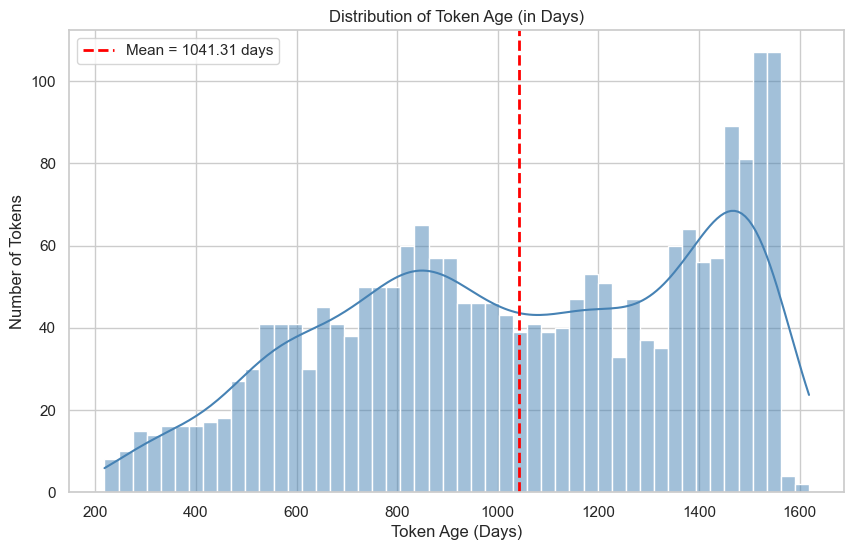

In [ ]:
sns.set_theme(style='whitegrid')
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")

# Convert token age to days
df['token_age_days'] = df['token_age_seconds'] / (60 * 60 * 24)

# Calculate mean
mean_age = df['token_age_days'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['token_age_days'], bins=50, kde=True, color='steelblue')

# Add vertical mean line
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_age:.2f} days')

# Labels and legend
plt.title('Distribution of Token Age (in Days)')
plt.xlabel('Token Age (Days)')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

## Token Creation Date Insights

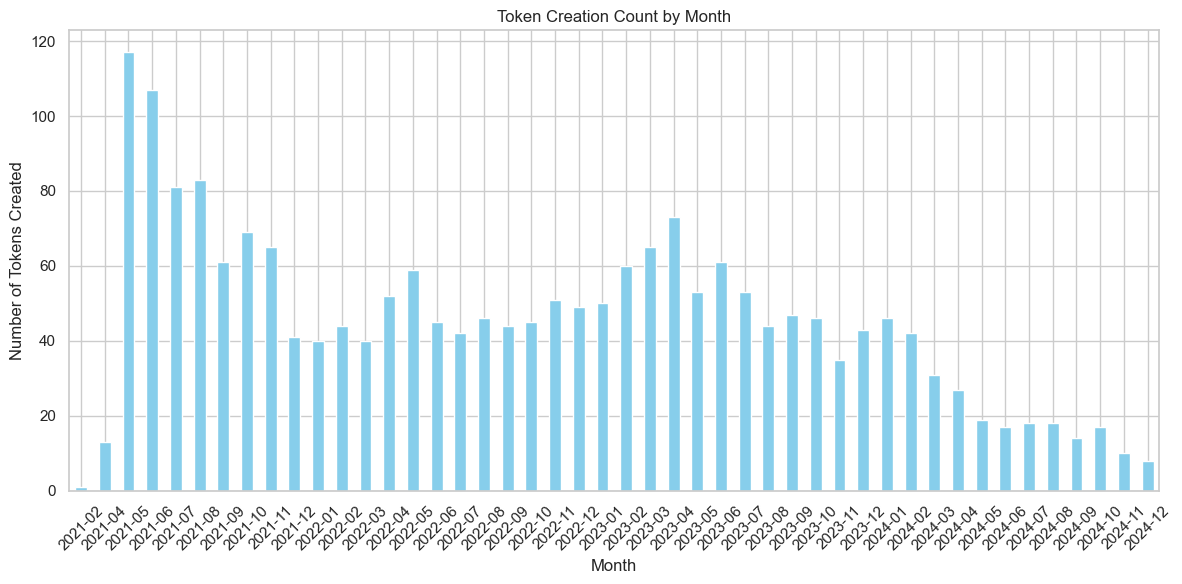

In [ ]:
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")

df['token_creation_date'] = pd.to_datetime(df['token_creation_date'])

# Optional: Sort the data (not strictly necessary)
df = df.sort_values('token_creation_date')

# Plot frequency of token creation over time (monthly)
plt.figure(figsize=(12, 6))
df['token_creation_date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Token Creation Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tokens Created')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

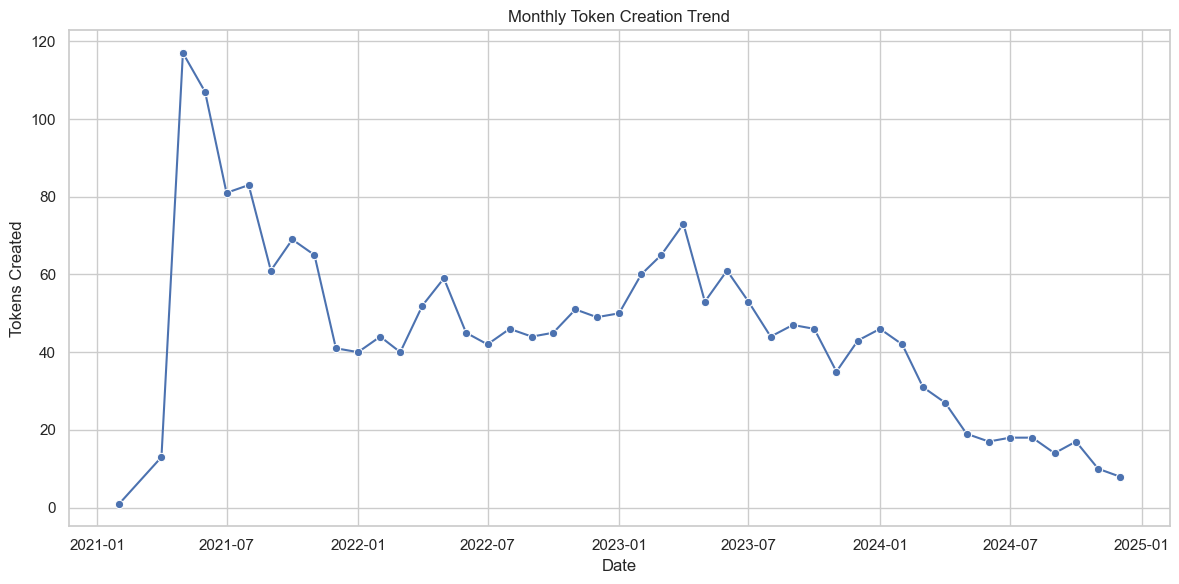

In [18]:
monthly_counts = df['token_creation_date'].dt.to_period('M').value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Monthly Token Creation Trend')
plt.xlabel('Date')
plt.ylabel('Tokens Created')
plt.grid(True)
plt.tight_layout()
plt.show()

## Creation to first trade delay: Time (seconds) and Blocks

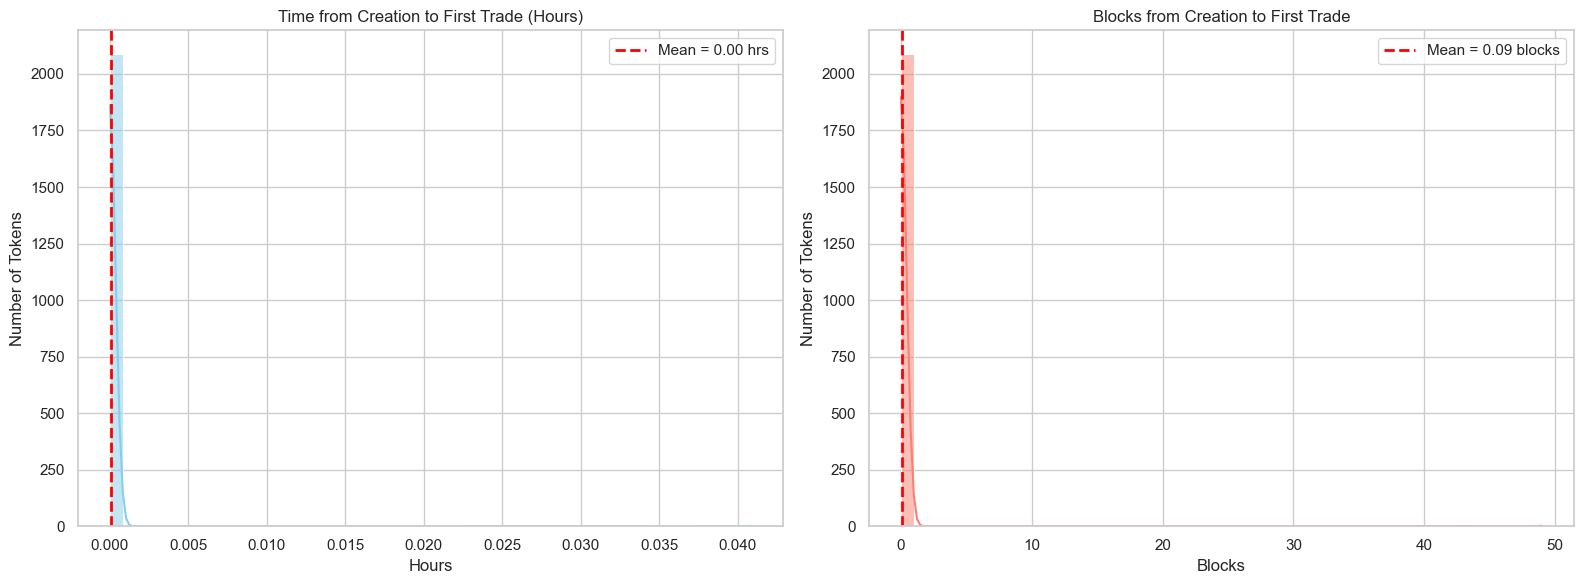

In [ ]:
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")
# Convert seconds to hours for better interpretability (if not already done)
df['first_trade_hours'] = df['creation_to_first_trade_seconds'] / 3600

# Compute means
mean_hours = df['first_trade_hours'].mean()
mean_blocks = df['creation_to_first_trade_blocks'].mean()

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time to first trade in hours
sns.histplot(df['first_trade_hours'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean_hours, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_hours:.2f} hrs')
axes[0].set_title('Time from Creation to First Trade (Hours)')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Number of Tokens')
axes[0].grid(True)
axes[0].legend()

# Plot 2: Blocks to first trade
sns.histplot(df['creation_to_first_trade_blocks'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean_blocks, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_blocks:.2f} blocks')
axes[1].set_title('Blocks from Creation to First Trade')
axes[1].set_xlabel('Blocks')
axes[1].set_ylabel('Number of Tokens')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

## Last active age (Time since last transaction)

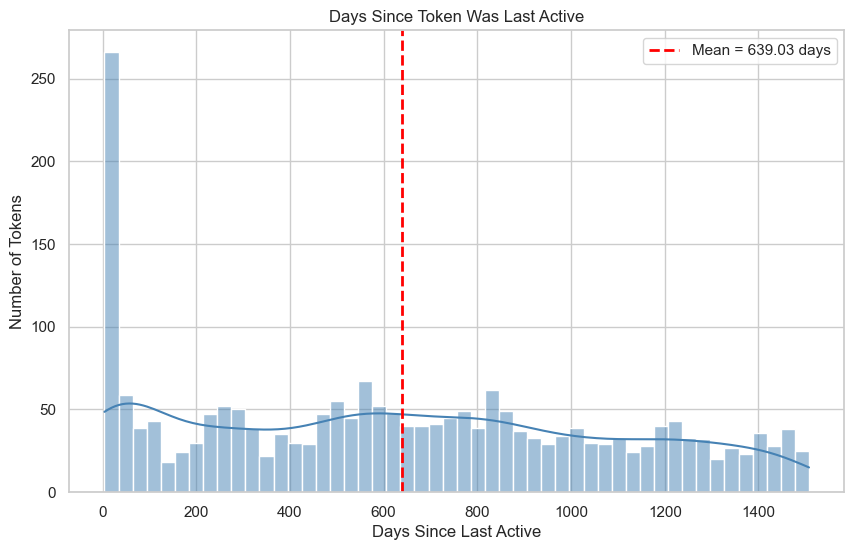

In [ ]:
df = pd.read_csv("../csv_outputs/master_lifecycle.csv")

df['last_active_age'] = pd.to_datetime(df['last_active_age'], errors='coerce')

# Get today's datetime
today = pd.to_datetime(datetime.today())
# Compute number of days since last activity
df['days_since_last_active'] = (today - df['last_active_age']).dt.total_seconds() / (60 * 60 * 24)
df_clean = df[df['days_since_last_active'].notnull()]
mean_days = df_clean['days_since_last_active'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['days_since_last_active'], bins=50, kde=True, color='steelblue')

# Add vertical line for the mean
plt.axvline(mean_days, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_days:.2f} days')

# Labels and legend
plt.title('Days Since Token Was Last Active')
plt.xlabel('Days Since Last Active')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

## How long the token was inactive

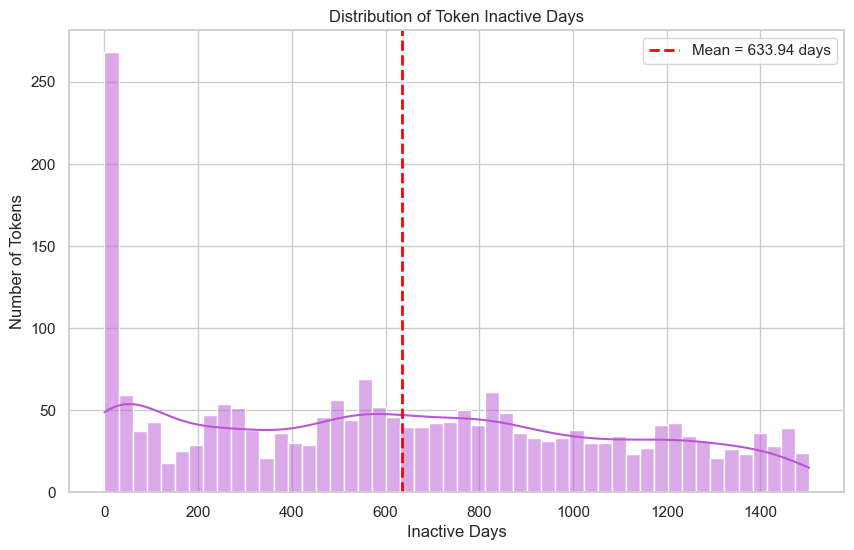

In [8]:
df_clean = df[df['inactive_days'].notnull()]

# Calculate mean
mean_inactive = df_clean['inactive_days'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['inactive_days'], bins=50, kde=True, color='mediumorchid')

# Add mean line
plt.axvline(mean_inactive, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_inactive:.2f} days')

# Labels and title
plt.title('Distribution of Token Inactive Days')
plt.xlabel('Inactive Days')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

### holder age was removed due to difficulties in retrieving the data